In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# zscore
from scipy.stats import zscore
# scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import *
# partitioning
from sklearn.model_selection import train_test_split
# naive bayes
from sklearn.naive_bayes import GaussianNB, CategoricalNB
# plot things
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain, plot_lift_curve

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [2]:
df = pd.read_csv("ravdess_features.csv")

In [3]:
df_num = df.drop(columns = ["modality", "vocal_channel", "emotional_intensity", "statement", "repetition", "actor", "channels", "frame_width"]).dropna()
df_num.T

,0,2,3,4,5,7,8,13,14,15,...,2438,2439,2440,2441,2442,2443,2446,2448,2450,2451
emotion,fearful,happy,surprised,happy,fearful,neutral,calm,calm,sad,sad,...,fearful,calm,neutral,sad,sad,calm,sad,calm,surprised,neutral
sex,F,F,F,F,F,F,F,F,F,F,...,M,M,M,M,M,M,M,M,M,M
sample_width,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
frame_rate,48000,48000,48000,48000,48000,48000,48000,48000,48000,48000,...,48000,48000,48000,48000,48000,48000,48000,48000,48000,48000
length_ms,3737,4671,3637,4404,3570,3437,3770,4504,5038,4872,...,3170,3504,3504,5305,4872,3837,5005,4171,3737,3837
frame_count,179379.0,224224.0,174575.0,211411.0,171371.0,164965.0,180981.0,216216.0,241842.0,233833.0,...,152152.0,168168.0,168168.0,254655.0,233834.0,184184.0,240240.0,200200.0,179379.0,184184.0
intensity,-36.793432,-32.290737,-49.019839,-31.214503,-36.312244,-49.095042,-45.906837,-54.745974,-43.82335,-35.549252,...,-48.653291,-43.782281,-43.906073,-26.666414,-29.512788,-47.141749,-36.811776,-43.342901,-45.751265,-40.018044
zero_crossings_sum,16995,18723,11617,15137,12143,11147,15293,13640,15485,15125,...,8648,8122,13087,11755,11043,10378,13981,8963,9716,9427
mfcc_mean,-33.485947,-30.532463,-36.059555,-31.405996,-30.500889,-36.048576,-33.899364,-34.821735,-38.21092,-32.44183,...,-30.060055,-26.460697,-26.366121,-20.926167,-22.787794,-28.68281,-24.80522,-31.160332,-28.242815,-29.019236
mfcc_std,134.65486,126.57711,159.72516,122.125824,132.58173,167.65213,159.19762,164.23001,151.0448,133.17375,...,166.5965,156.47433,149.74036,112.79364,113.3493,154.49243,138.31459,157.4997,159.9434,149.18895


In [4]:
y = np.array(df_num["emotion"]) # <--- this is the variable prediction parameter
categorical_cols = ["emotion", "sex"]
df_num = pd.get_dummies(df_num, columns=categorical_cols)
X = df_num.values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

In [5]:
norm = StandardScaler()
norm.fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

In [6]:
clf = KNeighborsClassifier(n_neighbors=5, metric="euclidean", weights="uniform")
clf.fit(X_train_norm, y_train)

KNeighborsClassifier(metric='euclidean')

In [7]:
clf.score(X_test_norm, y_test)

0.9877800407331976

In [8]:
%%time
param_grid = {
    "n_neighbors": np.arange(1, X_train.shape[0]//2),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "cityblock"],
}

grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid=param_grid,
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1,
    refit=True,
)
grid.fit(X_train_norm, y_train)
clf = grid.best_estimator_

CPU times: user 45.9 s, sys: 4.87 s, total: 50.7 s
Wall time: 7min 22s


In [9]:
print(grid.best_params_, grid.best_score_)

{'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'} 0.9961572052401746


In [10]:
clf.score(X_test_norm, y_test)

0.9877800407331976

In [11]:
grid.cv_results_

{'mean_fit_time': array([0.00198982, 0.00112516, 0.00103384, ..., 0.00131467, 0.00122046,
        0.00171198]),
 'std_fit_time': array([0.00255634, 0.00065472, 0.00062122, ..., 0.00086762, 0.0007752 ,
        0.0007968 ]),
 'mean_score_time': array([0.01319519, 0.00455727, 0.00989428, ..., 0.04616216, 0.04232249,
        0.05025294]),
 'std_score_time': array([0.00918828, 0.0018463 , 0.00441983, ..., 0.00673892, 0.00543169,
        0.01282755]),
 'param_metric': masked_array(data=['euclidean', 'euclidean', 'euclidean', ...,
                    'cityblock', 'cityblock', 'cityblock'],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_neighbors': masked_array(data=[1, 1, 2, ..., 570, 571, 571],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_weights': masked_array(data=['uniform', 'distance', 'uniform', ..., 'distance',
           

In [12]:
results = pd.DataFrame(grid.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,...,split43_test_score,split44_test_score,split45_test_score,split46_test_score,split47_test_score,split48_test_score,split49_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001990,0.002556,0.013195,0.009188,euclidean,1,uniform,"{'metric': 'euclidean', 'n_neighbors': 1, 'wei...",0.991266,0.991266,...,1.000000,0.991266,0.986900,1.000000,0.995633,0.978166,0.991266,0.991616,0.005513,61
1,0.001125,0.000655,0.004557,0.001846,euclidean,1,distance,"{'metric': 'euclidean', 'n_neighbors': 1, 'wei...",0.991266,0.991266,...,1.000000,0.991266,0.986900,1.000000,0.995633,0.978166,0.991266,0.991616,0.005513,61
2,0.001034,0.000621,0.009894,0.004420,euclidean,2,uniform,"{'metric': 'euclidean', 'n_neighbors': 2, 'wei...",0.986900,0.995633,...,0.991266,0.991266,0.986900,1.000000,0.986900,0.982533,0.991266,0.988472,0.006580,225
3,0.001289,0.002005,0.005295,0.003985,euclidean,2,distance,"{'metric': 'euclidean', 'n_neighbors': 2, 'wei...",0.991266,0.991266,...,1.000000,0.991266,0.986900,1.000000,0.995633,0.978166,0.991266,0.991616,0.005513,61
4,0.001007,0.000567,0.010698,0.004263,euclidean,3,uniform,"{'metric': 'euclidean', 'n_neighbors': 3, 'wei...",0.995633,1.000000,...,0.995633,0.995633,0.995633,1.000000,0.995633,0.995633,0.995633,0.994847,0.004759,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2279,0.001377,0.000921,0.046430,0.009891,cityblock,569,distance,"{'metric': 'cityblock', 'n_neighbors': 569, 'w...",0.733624,0.772926,...,0.733624,0.764192,0.772926,0.781659,0.707424,0.746725,0.759825,0.758428,0.018943,1880
2280,0.001599,0.001336,0.049176,0.016502,cityblock,570,uniform,"{'metric': 'cityblock', 'n_neighbors': 570, 'w...",0.633188,0.676856,...,0.681223,0.646288,0.694323,0.694323,0.628821,0.593886,0.620087,0.655371,0.024731,2210
2281,0.001315,0.000868,0.046162,0.006739,cityblock,570,distance,"{'metric': 'cityblock', 'n_neighbors': 570, 'w...",0.733624,0.772926,...,0.733624,0.764192,0.772926,0.781659,0.707424,0.746725,0.764192,0.758079,0.018833,1882
2282,0.001220,0.000775,0.042322,0.005432,cityblock,571,uniform,"{'metric': 'cityblock', 'n_neighbors': 571, 'w...",0.633188,0.676856,...,0.681223,0.650655,0.694323,0.689956,0.628821,0.593886,0.620087,0.653712,0.025526,2212


In [13]:
results["metric_weight"] = results["param_metric"] + " , " + results["param_weights"]

<AxesSubplot:xlabel='param_n_neighbors', ylabel='mean_test_score'>

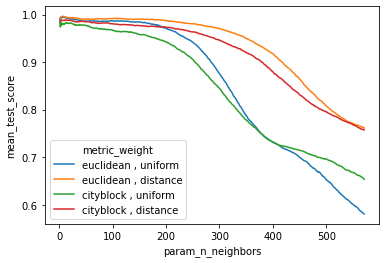

In [14]:
sns.lineplot(
    data=results, x="param_n_neighbors", y="mean_test_score", hue="metric_weight"
)

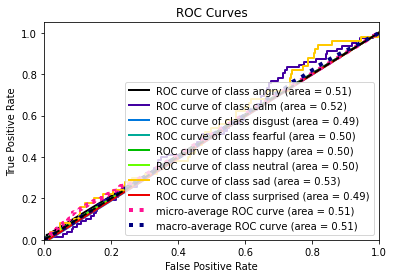

0.5046466252842865


In [15]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
plot_roc(y_test, clf.predict_proba(X_test))
plt.show()
print(roc_auc_score(y_test, clf.predict_proba(X_test), multi_class="ovr", average="macro"))